# Data Examples

First we have to some setup

In [1]:
import chimeric_tools.Data as ctd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

import warnings
warnings.filterwarnings('ignore')


## Loading Raw Data

#### Daily Data

If you want to load the raw data with no constraints on date or location you can easily do this by simply using the load functions.

Here we are going to **load daily cases** and plot the US cases.

<AxesSubplot:xlabel='date', ylabel='value'>

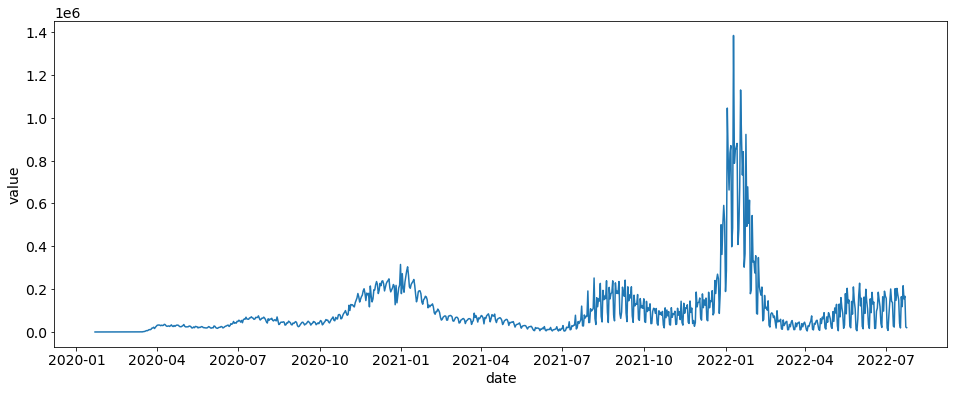

In [2]:
daily_cases = ctd.load_cases_truths()
daily_cases = daily_cases.loc[daily_cases.location == "US"]
sns.lineplot(x="date", y="value", data=daily_cases)

#### Turning Daily Cases into Weekly Cases

If you want to turn these daily cases into weekly cases then you can use the `daily_to_weekly` This function (for now) requires specific columns for it to work: `[ date: date or str, location: str, location_name, str,  value: int or float]`

<AxesSubplot:xlabel='date', ylabel='value'>

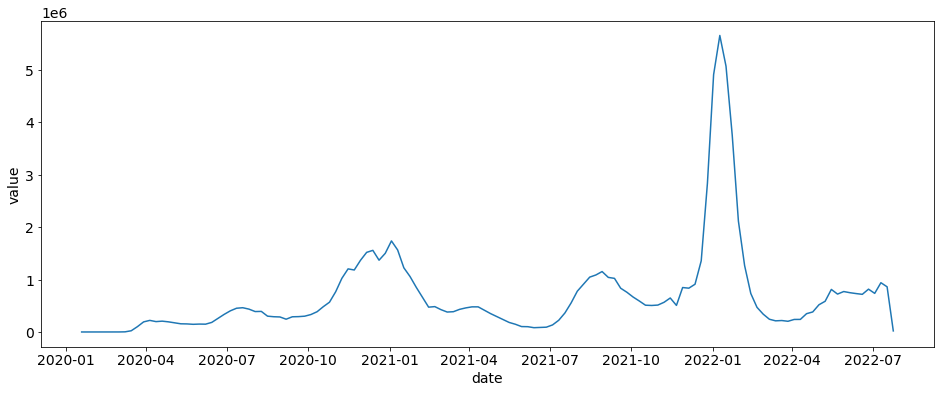

In [3]:
weekly_cases = ctd.daily_to_weekly(daily_cases)
sns.lineplot(x="date", y="value", data=weekly_cases)

## Getting Processed Covid Data

The function `covid_data()` is the bread and butter to getting COVID data with custom FIPS, date ranges, and types.

If you want everything that the dataset has to offer, all the dates, all the FIPS, predictions, and residuals then you can simply run `covid_data()`

In [4]:
ctd.covid_data().head()

,location,location_name,date,end_date,EW,cases,preds_cases,residuals_cases,deaths,preds_deaths,residuals_deaths,hosps,preds_hosps,residuals_hosps
0,1,Alabama,2020-01-19,2020-01-25,202004,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,1,Alabama,2020-01-26,2020-02-01,202005,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,1,Alabama,2020-02-02,2020-02-08,202006,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,1,Alabama,2020-02-09,2020-02-15,202007,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
4,1,Alabama,2020-02-16,2020-02-22,202008,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0


If I want to get just case data for the US and PA in 2021 and plot each, I can easily do this with `geo_values`, `start_date`, and `end_date`.

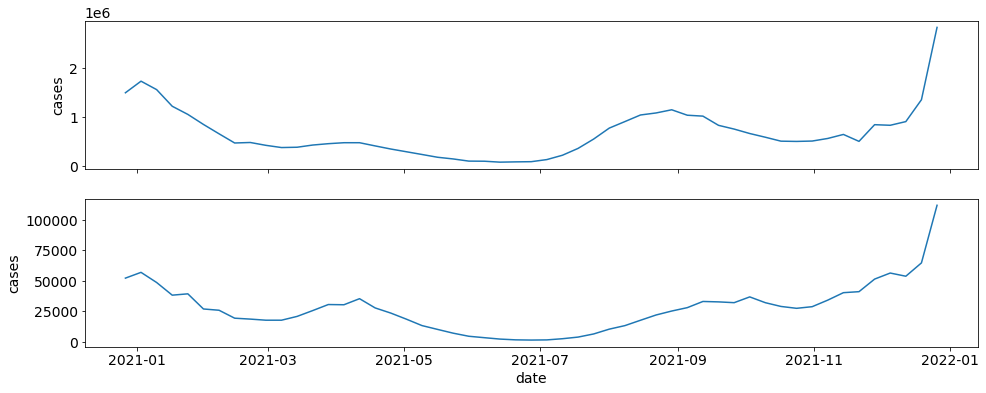

In [5]:
locations = ["US", "42"]
data = ctd.covid_data(start_date="2021-01-01", end_date="2021-12-31", geo_values=locations, include=["cases"], preds=False)


fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
ax = 0
for locs in locations:
    sub_data = data.loc[data.location == locs]
    sns.lineplot(x="date", y="cases", data=sub_data, ax=axes[ax])
    ax += 1
    